In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.set_printoptions(threshold=np.nan)
from matplotlib.colors import ListedColormap

data = pd.read_csv("../Data/preprocessed_final.csv")
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})

#Only the no glasses data is used, so drop all the glasses data
data = data.drop(data[data["Conditie"] > 0].index)

#Create alcohol classes
data['Alcohol_Class'] = data['Alcohol'].astype(float)
conditions = [
    (data['Alcohol'] == 0),
    (data['Alcohol'] > 0) & (data['Alcohol'] < 1.5),
    (data['Alcohol'] > 1.5)]
choices = [0,1,2]
data['Alcohol_Class'] = np.select(conditions, choices, default=0)

data

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Alcohol_Class,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,GaitTime
0,0,6,177,70.0,20,22.343516,0.00,0,4.725911,1.175792,1.187491,0.051247,0.040761,0.664377,2.191667
2,0,9,195,86.0,23,22.616700,0.00,0,5.022392,1.114992,1.121095,0.022745,0.019538,0.700817,2.241667
4,0,10,165,65.0,28,23.875115,0.00,0,4.189830,0.822858,0.855915,0.106283,0.095379,0.516998,3.133333
6,0,11,179,68.0,25,21.222808,0.00,0,4.336345,0.989439,1.000792,0.021762,0.018467,0.586470,2.508333
8,0,13,168,70.0,18,24.801587,0.00,0,4.825908,1.049215,1.053802,0.025560,0.020575,0.639974,2.383333
10,0,14,165,55.0,20,20.202020,0.00,0,4.469692,1.129709,1.134625,0.025017,0.020754,0.605904,2.258333
12,0,15,176,65.0,13,20.983988,0.00,0,10.786251,1.188127,1.204380,0.034557,0.030307,0.718547,2.125000
14,0,16,175,64.0,25,20.897959,0.00,0,3.746139,1.202106,1.211136,0.018895,0.015832,0.611920,2.125000
16,0,17,190,80.0,27,22.160665,0.00,0,5.420258,1.070075,1.085942,0.067241,0.058849,0.698422,2.383333
18,0,18,179,72.0,28,22.471209,0.00,0,3.910137,1.293483,1.300594,0.026756,0.021141,0.718495,1.966667


In [56]:
#Code to get X_train, y_train, X_test and y_test for the plots
X = data[['GaitTime', 'mean_StepLength', 'Height']]
y = data[['Alcohol_Class']]

#Split the data in training and validation
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), stratify = y, test_size = 0.30)

X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)

#Standardize X components
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Apply dimensionality reduction
pca = PCA(n_components=3)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

#Fit the classifier
classifier = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.01)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test) 


print(accuracy_score(y_test, y_pred)*100)

59.5744680851


In [26]:
#Plot confusion matrix
class_names = ['No alcohol', 'Low alcohol', 'High alcohol']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'confusion_matrix' is not defined

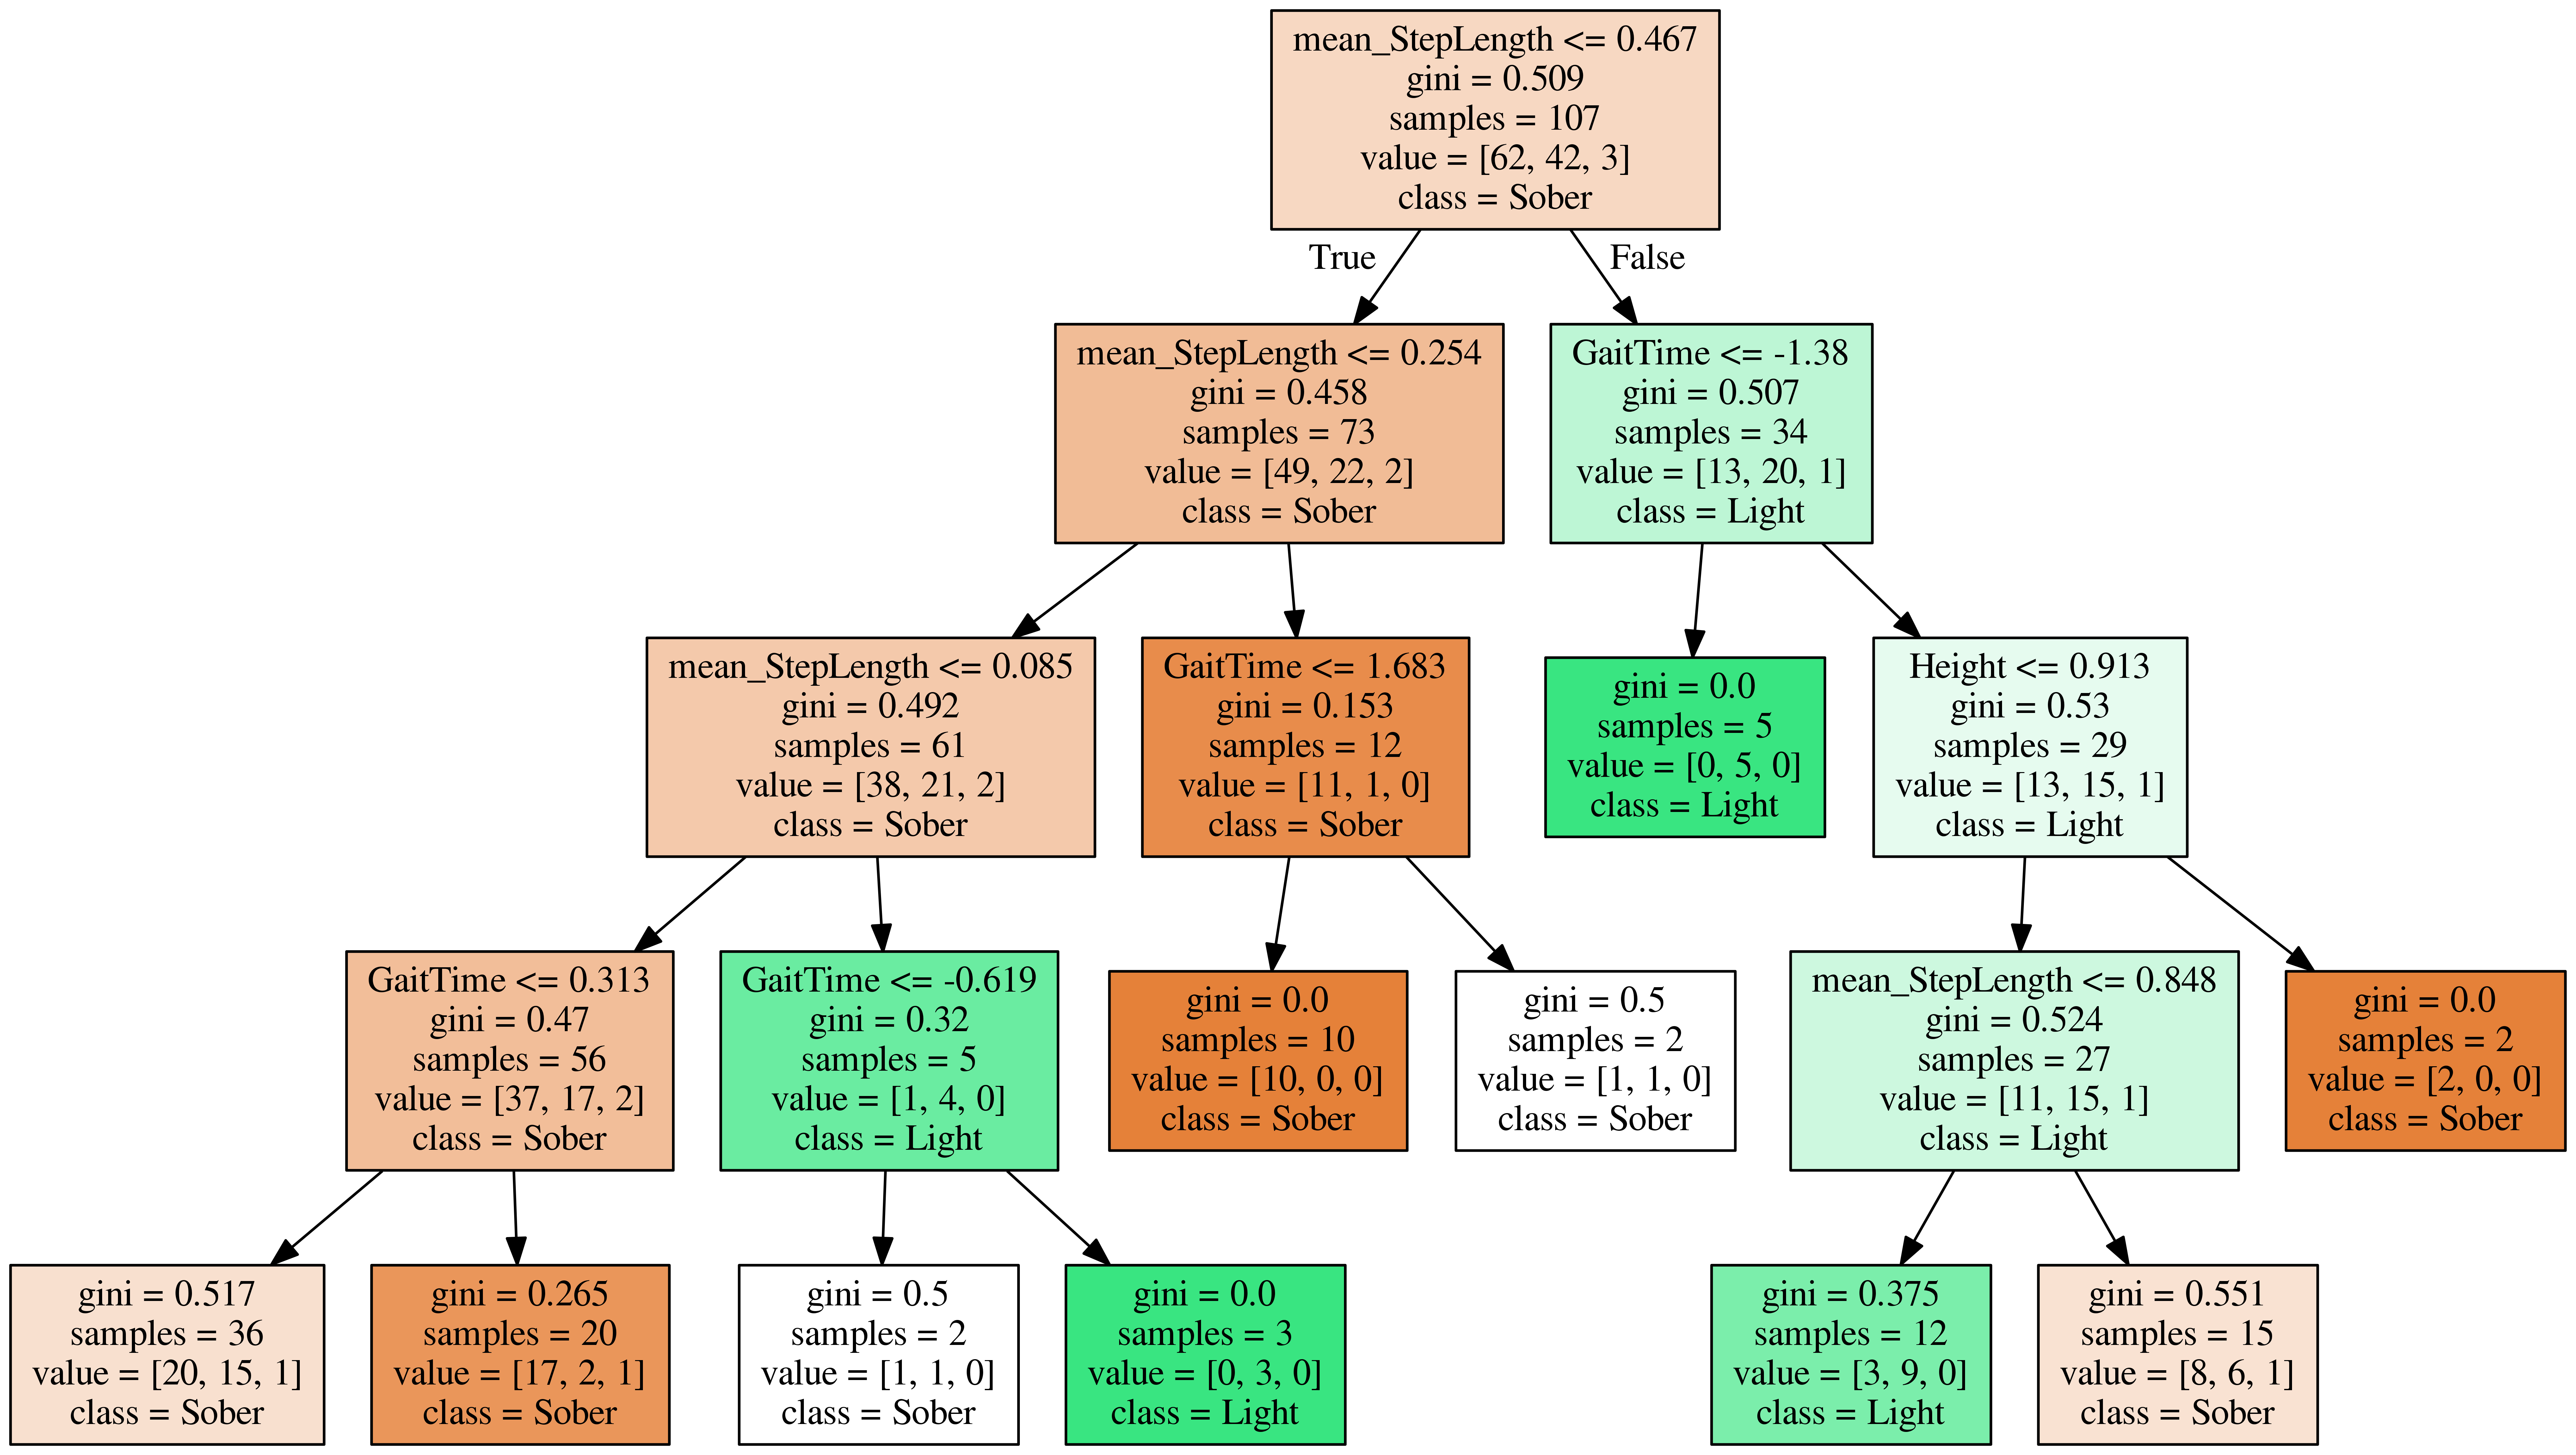

In [57]:
#Plot decision tree
tree.export_graphviz(classifier, out_file='alcohol_tree.dot', feature_names=['GaitTime', 'mean_StepLength', 'Height'], class_names= ['Sober', 'Light', 'High'], filled=True)

from subprocess import call
call(['dot', '-Tpng', 'alcohol_tree.dot', '-o', 'alcohol_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'alcohol_tree.png')

In [67]:
#Code that loops through the data 100 times and calculates the accuracy for every loop and returns the mean
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    X = data.drop(['Alcohol_Class', 'SubjectID'], axis=1)
    y = data[['Alcohol_Class']]

    #Stratify data
    X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), stratify = y, test_size = 0.30)
    
    X_train = np.array(X_train, dtype=float)
    y_train = np.array(y_train, dtype=int)

    X_test = np.array(X_test, dtype=float)
    y_test = np.array(y_test, dtype=int)

    #Standardize data
    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #Apply dimensionality reduction
    pca = PCA(n_components=2)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    #Fit the classifier
    classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.01)  
    classifier.fit(X_train, y_train)  

    y_pred = classifier.predict(X_test) 

    return f1_score(y_test, y_pred, average="macro", labels=np.unique(y_pred))*100


# make_decisions(data, variable_list)

In [68]:
#Code that prints the accuracy of varies variable combinations
print('mad_SegmentData, mean_StepLength:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class','mean_StepLength', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
print('mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, mad_SegmentData:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'GaitTime', 'mad_SegmentData']) for i in range(100)]), 2),'%.')
print('std_SegmentData, GaitVelocity, MovementVelocity, mean_StepLength:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, GaitVelocity, MovementVelocity, mean_StepLength, std_SegmentData:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity', 'mean_StepLength', 'GaitTime', 'std_SegmentData']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, Height:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'GaitTime', 'Height']) for i in range(100)]), 2),'%.')
print('GaitTime, mean_StepLength, Age:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'GaitTime', 'Age']) for i in range(100)]), 2),'%.')
print('mean_StepLength, Height:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'Height']) for i in range(100)]), 2),'%.')
print('mean_StepLength, Age:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mean_StepLength', 'Age']) for i in range(100)]), 2),'%.')
print('GaitTime, Height:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'GaitTime', 'Height']) for i in range(100)]), 2),'%.')
print('std_SegmentData, Height:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mad_SegmentData', 'Height']) for i in range(100)]), 2),'%.')
print('mad_SegmentData, Age:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'mad_SegmentData', 'Age']) for i in range(100)]), 2),'%.')
print('std_SegmentData, GaitTime, mean_StepLength:', round(np.mean([make_decisions(data, ['SubjectID', 'Alcohol_Class', 'GaitTime', 'mean_StepLength', 'std_SegmentData']) for i in range(100)]), 2),'%.')

mad_SegmentData, mean_StepLength: 50.13 %.
mean_StepLength, std_SegmentData: 48.53 %.
GaitTime, mean_StepLength, mad_SegmentData: 49.89 %.
std_SegmentData, GaitVelocity, MovementVelocity, mean_StepLength: 50.1 %.
GaitTime, GaitVelocity, MovementVelocity, mean_StepLength, std_SegmentData: 49.08 %.
GaitTime, mean_StepLength, Height: 49.09 %.
GaitTime, mean_StepLength, Age: 48.85 %.
mean_StepLength, Height: 48.31 %.
mean_StepLength, Age: 44.57 %.
GaitTime, Height: 49.34 %.
std_SegmentData, Height: 46.13 %.
mad_SegmentData, Age: 42.62 %.
std_SegmentData, GaitTime, mean_StepLength: 50.77 %.
